# Create summary data for Uganda

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
data_folder = "../data"
#TODO make consistent

Read data

In [4]:
df = pd.read_csv("../data/uganda_23_month.csv")

check this is what we're expecting from our cleaned data

In [5]:
%matplotlib inline

In [6]:
df #only 12 so we can just output

,Unnamed: 0,month,count,amount
0,1,January,463,13619116218
1,2,February,541,8292941459
2,3,March,575,5823219890
3,4,April,427,368351560409
4,5,May,901,7850336097
5,6,June,919,2673251903423
6,7,July,880,24433334131
7,8,August,352,6850442801
8,9,September,621,29336201504
9,10,October,771,8107572509


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12 non-null     int64 
 1   month       12 non-null     object
 2   count       12 non-null     int64 
 3   amount      12 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [8]:
df.dtypes #check read in ok

Unnamed: 0     int64
month         object
count          int64
amount         int64
dtype: object

In [9]:
# but we actually want row level data
df = pd.read_csv("../data/uganda_22_awards.csv")


In [10]:
# fix dtypes
df.date = df.date.astype('datetime64[ns]')
df.awards_date = df.awards_date.astype('datetime64[ns]')
df.tag = df.tag.astype('string')
df.awards_v_currency = df.awards_v_currency.astype('string')
df.awards_suppliers_name = df.awards_suppliers_name.astype('string')

In [11]:
df.dtypes

Unnamed: 0                        int64
ocid                             object
date                     datetime64[ns]
tag                              string
awards_id                         int64
awards_date              datetime64[ns]
awards_v_amount                 float64
awards_v_currency                string
awards_suppliers_id               int64
awards_suppliers_name            string
dtype: object

In [12]:
df.head(8)

,Unnamed: 0,ocid,date,tag,awards_id,awards_date,awards_v_amount,awards_v_currency,awards_suppliers_id,awards_suppliers_name
0,1,ocds-rdvc92-631653997616,2022-05-31 11:46:56,compiled,117974,2022-05-31 11:51:35,2200000.0,UGX,67697,New Vision Printing & Publishing
1,2,ocds-rdvc92-811665914856,2022-10-16 10:07:36,compiled,125008,2022-10-16 10:09:34,3800000.0,UGX,70809,KLASI ENTERPRISES LTD
2,3,ocds-rdvc92-421656316967,2022-06-27 08:02:47,compiled,120218,2022-06-27 08:09:24,4956000.0,UGX,3399,Business tools ltd
3,4,ocds-rdvc92-681657019743,2022-07-05 11:15:43,compiled,121090,2022-07-05 11:19:22,1551800.0,UGX,1251,Patience garage ltd
4,5,ocds-rdvc92-551667388357,2022-11-02 11:25:57,compiled,125521,2022-11-02 11:31:04,700000.0,UGX,71270,Krisna general Enterprises Limited P.O Box 513...
5,6,ocds-rdvc92-601655988044,2022-06-23 12:40:44,compiled,120066,2022-06-23 12:49:26,2300000.0,UGX,10106,Monitor publications limited
6,7,ocds-rdvc92-801643363686,2022-01-28 09:54:46,compiled,112477,2022-01-28 10:00:25,7245000.0,UGX,10571,In line print services
7,8,ocds-rdvc92-281663874007,2022-09-22 19:13:27,compiled,123993,2022-09-22 19:18:00,5760000.0,UGX,370,Harikel enterprises limited


In [13]:
# distribution of values
# but we should not expect normal dist anyway
import numpy as np
numbers = df.select_dtypes(include = np.number)



<AxesSubplot:>

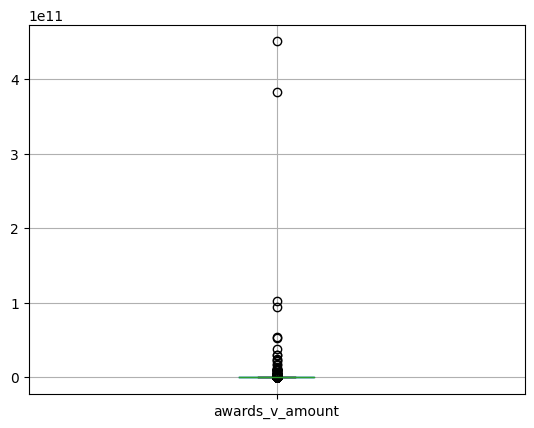

In [14]:
df.boxplot('awards_v_amount')

In [15]:
# look at those maxes
top_awards = df.sort_values('awards_v_amount', ascending=False).head(10)
top_awards

,Unnamed: 0,ocid,date,tag,awards_id,awards_date,awards_v_amount,awards_v_currency,awards_suppliers_id,awards_suppliers_name
6639,6640,ocds-rdvc92-661656313351,2022-06-27 07:02:31,compiled,120212,2022-06-27 07:13:33,4.508214e+11,UGX,69030,Stirling Civil Engineering Ltd
8358,8359,ocds-rdvc92-741656321355,2022-06-27 09:15:55,compiled,120235,2022-06-27 09:53:45,3.832177e+11,UGX,42195,Abubaker Technical Services & General Supplies...
12031,12032,ocds-rdvc92-831668756304,2022-11-18 07:25:04,compiled,126001,2022-11-18 07:43:32,1.030062e+11,UGX,71515,M/s SMS Construction (U) Limited
10452,10453,ocds-rdvc92-151667464588,2022-11-03 08:36:28,compiled,125538,2022-11-03 10:14:11,9.384636e+10,UGX,26992,Dott services ltd
1971,1972,ocds-rdvc92-741657095811,2022-07-06 08:23:31,compiled,121151,2022-07-06 09:12:24,5.358942e+10,UGX,31402,China railway seventh group co. ltd
2134,2135,ocds-rdvc92-561648548846,2022-03-29 10:14:06,compiled,114930,2022-03-30 12:58:37,5.333668e+10,UGX,27628,Chongqing international construction corporati...
12596,12597,ocds-rdvc92-131672298718,2022-12-29 07:25:18,compiled,127318,2022-12-29 08:39:19,3.816827e+10,UGX,72164,AMBITIOUS CONSTRUCTION COMPNAY LIMITED
7434,7435,ocds-rdvc92-731650967747,2022-04-26 10:09:07,compiled,115778,2022-04-26 10:54:28,2.963586e+10,UGX,66796,M/s Abubaker Technical Services and General Su...
8767,8768,ocds-rdvc92-611653400578,2022-05-24 13:56:18,compiled,117983,2022-05-31 12:34:35,2.963313e+10,UGX,29469,Shajapa technical works ltd
7402,7403,ocds-rdvc92-811655297134,2022-06-15 12:45:34,compiled,119179,2022-06-15 13:04:41,2.393547e+10,UGX,7535,Chongqing international construction corporation


In [16]:
# mins
btm_awards = df.sort_values('awards_v_amount', ascending=True).head(10)
btm_awards

,Unnamed: 0,ocid,date,tag,awards_id,awards_date,awards_v_amount,awards_v_currency,awards_suppliers_id,awards_suppliers_name
3525,3526,ocds-rdvc92-711666076953,2022-10-18 07:09:13,compiled,125164,2022-10-18 08:29:56,0.0,UGX,71111,M/s Cosake (U) ltd
11323,11324,ocds-rdvc92-431661848478,2022-08-30 08:34:46,compiled,126137,2022-11-22 17:22:47,0.0,UGX,71629,Broll (U) Limited
11763,11764,ocds-rdvc92-431662019987,2022-09-01 08:13:07,compiled,126805,2022-12-15 07:21:31,0.0,UGX,52471,Monitor Publications Ltd (KFM)
10788,10789,ocds-rdvc92-681658132219,2022-07-18 08:16:59,compiled,122065,2022-07-18 08:21:09,34.0,USD,43400,Sanlam General Insurance Uganda Limited
5058,5059,ocds-rdvc92-361658136772,2022-07-18 09:32:52,compiled,122088,2022-07-18 09:39:07,40.0,USD,30069,Sanlam general insurance
5782,5783,ocds-rdvc92-231658131701,2022-07-18 08:08:21,compiled,122063,2022-07-18 08:11:44,70.0,USD,30069,Sanlam general insurance
5078,5079,ocds-rdvc92-431658130621,2022-07-18 07:50:21,compiled,122059,2022-07-18 07:54:54,70.0,USD,69947,Sanlaam General Insurance
8997,8998,ocds-rdvc92-961658135325,2022-07-18 09:08:45,compiled,122084,2022-07-18 09:13:57,82.0,USD,43400,Sanlam General Insurance Uganda Limited
5872,5873,ocds-rdvc92-831658128790,2022-07-18 07:19:50,compiled,122050,2022-07-18 07:22:46,100.0,USD,69947,Sanlaam General Insurance
10800,10801,ocds-rdvc92-591658137299,2022-07-18 09:41:39,compiled,122094,2022-07-18 09:46:16,115.0,USD,30069,Sanlam general insurance


In [17]:
# remove records where award is zero valued
df = df[df.awards_v_amount > 0]
# then run cell above again to confirm

In [18]:
# exclude top 10 in plot
mask = ~df.ocid.isin(top_awards.ocid)
exltop = df[mask]

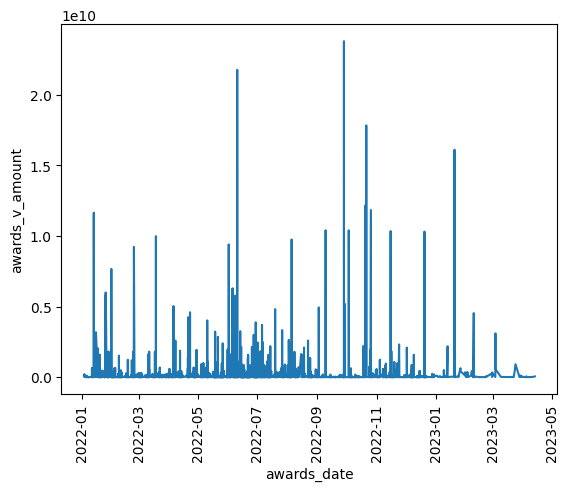

In [26]:

import matplotlib.pyplot as plt
plt.figure()
chart = sns.lineplot(x='awards_date', y="awards_v_amount", data=exltop)

# Rotate the xlabels
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

chart.xaxis.set_tick_params(labelrotation = 90)

# Show the plot
plt.show()